In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
data =pd.read_csv('hour.csv', sep=',')
data.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [3]:
data.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [4]:
#Переименнуем колонки
data.rename(columns={
                    'instant':'rec_id',
                    'dteday':'datetime',
                    'yr':'year',
                    'mnth':'month',
                    'hr': 'hour',
                    'weathersit':'weather_condition', 
                    'hum':'humidity',
                    'cnt':'total_count'
                },inplace=True)



In [5]:
data.head(5)

rec_id    datetime  season  year  month  hour  holiday  weekday  \
0       1  2011-01-01       1     0      1     0        0        6   
1       2  2011-01-01       1     0      1     1        0        6   
2       3  2011-01-01       1     0      1     2        0        6   
3       4  2011-01-01       1     0      1     3        0        6   
4       5  2011-01-01       1     0      1     4        0        6   

   workingday  weather_condition  temp   atemp  humidity  windspeed  casual  \
0           0                  1  0.24  0.2879      0.81        0.0       3   
1           0                  1  0.22  0.2727      0.80        0.0       8   
2           0                  1  0.22  0.2727      0.80        0.0       5   
3           0                  1  0.24  0.2879      0.75        0.0       3   
4           0                  1  0.24  0.2879      0.75        0.0       0   

   registered  total_count  
0          13           16  
1          32           40  
2          27           32  
3          10           13  
4           1            1

In [6]:
#Приведем тип даты и времени и числовые атрибуты
data['datetime']=pd.to_datetime(data.datetime)

data['season']=data.season.astype('category')
data['year']=data.year.astype('category')
data['month']=data.month.astype('category')
data['holiday']=data.holiday.astype('category')
data['weekday']=data.weekday.astype('category')
data['workingday']=data.workingday.astype('category')
data['weather_condition']=data.weather_condition.astype('category')

In [7]:
select = ['season', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather_condition', 'temp', 'atemp', 'humidity', 'windspeed']
X=data[select]

In [8]:
y=data['total_count']

In [9]:
#Разделение выборки на обучающую и тестовую
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

X_test.reset_index(inplace=True)
y_test=y_test.reset_index()

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print(y_train.head())
print(y_test.head())

(12165, 12) (5214, 12) (12165, 2) (5214, 2)
   index  total_count
0  11229            9
1   6334          209
2  11060           30
3  12346          644
4  15437          217
   index  total_count
0  12830          425
1   8688           88
2   7091            4
3  12230          526
4    431           13


In [10]:
X_train

index season month  hour holiday weekday workingday weather_condition  \
0      11229      2     4     2       0       3          1                 2   
1       6334      4     9    12       0       1          1                 2   
2      11060      2     4     0       0       3          1                 1   
3      12346      2     6    15       0       0          0                 1   
4      15437      4    10    10       0       3          1                 1   
...      ...    ...   ...   ...     ...     ...        ...               ...   
12160  11284      2     4     9       0       5          1                 1   
12161  11964      2     5    17       0       5          1                 1   
12162   5390      3     8    12       0       3          1                 1   
12163    860      1     2     7       0       2          1                 1   
12164  15795      4    10     8       0       4          1                 2   

       temp   atemp  humidity  windspeed  
0      0.50  0.4848      0.42     0.1940  
1      0.68  0.6364      0.79     0.1642  
2      0.34  0.3030      0.36     0.4179  
3      0.70  0.6364      0.34     0.0000  
4      0.56  0.5303      0.52     0.2985  
...     ...     ...       ...        ...  
12160  0.46  0.4545      0.88     0.0896  
12161  0.66  0.6212      0.34     0.1343  
12162  0.80  0.7273      0.43     0.2836  
12163  0.24  0.1970      0.65     0.4179  
12164  0.52  0.5000      0.83     0.1642  

[12165 rows x 12 columns]

In [11]:
# Разделим характеристики на категориальные и числовые
cat_attributes=['season','holiday','workingday','weather_condition', 'hour']
num_attributes=['temp','windspeed','humidity','month','weekday']

In [12]:
train_encoded_attributes=pd.get_dummies(X_train,columns=cat_attributes)
print('Shape of transfomed dataframe::',train_encoded_attributes.shape)
train_encoded_attributes.head(5)

Shape of transfomed dataframe:: (12165, 43)


index month weekday  temp   atemp  humidity  windspeed  season_1  season_2  \
0  11229     4       3  0.50  0.4848      0.42     0.1940         0         1   
1   6334     9       1  0.68  0.6364      0.79     0.1642         0         0   
2  11060     4       3  0.34  0.3030      0.36     0.4179         0         1   
3  12346     6       0  0.70  0.6364      0.34     0.0000         0         1   
4  15437    10       3  0.56  0.5303      0.52     0.2985         0         0   

   season_3  ...  hour_14  hour_15  hour_16  hour_17  hour_18  hour_19  \
0         0  ...        0        0        0        0        0        0   
1         0  ...        0        0        0        0        0        0   
2         0  ...        0        0        0        0        0        0   
3         0  ...        0        1        0        0        0        0   
4         0  ...        0        0        0        0        0        0   

   hour_20  hour_21  hour_22  hour_23  
0        0        0        0        0  
1        0        0        0        0  
2        0        0        0        0  
3        0        0        0        0  
4        0        0        0        0  

[5 rows x 43 columns]

In [13]:
X_train=train_encoded_attributes
y_train = y_train.total_count.values

### Линейная регрессия

In [14]:
#Создание модели линейной регрессии
from sklearn.linear_model import LinearRegression

linearModel=LinearRegression()
linearModel.fit(X_train,y_train)

LinearRegression()

In [15]:
lr=linearModel.score(X_train,y_train)
print('Accuracy of the model :',lr)
print('Model coefficients :',linearModel.coef_)
print('Model intercept value :',linearModel.intercept_)

Accuracy of the model : 0.6830987407761394
Model coefficients : [ 9.80501991e-03 -7.77023022e+00  2.16719547e+00  1.31824528e+02
  1.21097218e+02 -7.18869525e+01 -3.01051270e+01 -3.71875317e+01
  7.10985736e+00 -3.88990531e+00  3.39675796e+01  1.29630879e+01
 -1.29630879e+01 -1.88235235e+00  1.88235235e+00  5.19867698e+01
  4.07353292e+01 -1.18518104e+01 -8.08702886e+01 -1.25558532e+02
 -1.39886675e+02 -1.53529106e+02 -1.64223987e+02 -1.66285773e+02
 -1.46648038e+02 -8.92822552e+01  4.68416392e+01  1.88943574e+02
  3.89262685e+01 -1.34994477e+01  1.09115695e+01  5.06771958e+01
  4.79118180e+01  2.39492204e+01  3.05950615e+01  1.00136017e+02
  2.60141784e+02  2.15488801e+02  1.13252886e+02  3.49231977e+01
 -1.73801039e+01 -5.35318821e+01 -9.28732328e+01]
Model intercept value : 19.81788708980946


In [16]:
from sklearn.model_selection import cross_val_score,cross_val_predict
predict=cross_val_predict(linearModel,X_train,y_train,cv=3)
predict

array([103.73163707, 259.68383009,  96.90200303, ..., 281.1141482 ,
        84.42687211, 450.46535845])

In [17]:
#R-squared scores
r2_scores = cross_val_score(linearModel, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.6807381870733099


In [18]:
test_encoded_attributes=pd.get_dummies(X_test,columns=cat_attributes)
print('Shape of transformed dataframe :',test_encoded_attributes.shape)
test_encoded_attributes.head(5)

Shape of transformed dataframe : (5214, 43)


index month weekday  temp   atemp  humidity  windspeed  season_1  season_2  \
0  12830     6       6  0.80  0.6970      0.27     0.1940         0         0   
1   8688     1       1  0.24  0.2273      0.41     0.2239         1         0   
2   7091    10       5  0.32  0.3030      0.66     0.2836         0         0   
3  12230     5       2  0.78  0.7121      0.52     0.3582         0         1   
4    431     1       4  0.26  0.2273      0.56     0.3881         1         0   

   season_3  ...  hour_14  hour_15  hour_16  hour_17  hour_18  hour_19  \
0         1  ...        0        0        0        0        0        1   
1         0  ...        0        0        0        0        0        0   
2         0  ...        0        0        0        0        0        0   
3         0  ...        0        0        0        0        0        1   
4         0  ...        0        0        0        0        0        0   

   hour_20  hour_21  hour_22  hour_23  
0        0        0        0        0  
1        1        0        0        0  
2        0        0        0        0  
3        0        0        0        0  
4        0        0        0        0  

[5 rows x 43 columns]

In [19]:
X_test=test_encoded_attributes
y_test=y_test.total_count.values

In [20]:
#Тестирование модели на тестовом наборе
y_pred_linear=linearModel.predict(X_test)

#Получение метрик качества R2, MSE, MAE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('Linear Model Estimation:')
print('R2_score: ',round(r2_score(y_test,y_pred_linear),2))
print('MSE: ',round(mean_squared_error(y_test,y_pred_linear),2))
print('MAE: ',round(mean_absolute_error(y_test,y_pred_linear),2))

Linear Model Estimation:
R2_score:  0.68
MSE:  10201.06
MAE:  74.48


In [21]:
print("Правильность на train наборе:{:.2f}".format (linearModel.score(X_train, y_train)))
print("Правильность на test наборе:{:.4f}".format (linearModel.score(X_test, y_test)))

Правильность на train наборе:0.68
Правильность на test наборе:0.6771


### Полиномиальный регрессор

In [22]:
#Подготовка полиномиальных характеристик степени 2 для обучающего набора
from sklearn.preprocessing import PolynomialFeatures
quadratic=PolynomialFeatures(degree=2)

X_train_quad=quadratic.fit_transform(X_train)

In [23]:
#Создание линейной регрессии и её обучение на полученных полиномиальных характеристиках степени 2 (полиномиальная регрессия)
quadModel=LinearRegression()
quadModel.fit(X_train_quad,y_train)

LinearRegression()

In [24]:
#Тестирование полиномиальной модели степени 2 на тестовом наборе
X_test_quad=quadratic.fit_transform(X_test)
y_pred_quad=quadModel.predict(X_test_quad)

print('Polynomial Model Estimation:')
print('R2_score: ',round(r2_score(y_test,y_pred_quad),2))
print('MSE: ',round(mean_squared_error(y_test,y_pred_quad),2))
print('MAE: ',round(mean_absolute_error(y_test,y_pred_quad),2))

Polynomial Model Estimation:
R2_score:  0.9
MSE:  3018.1
MAE:  37.65


In [25]:
# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10)

In [27]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

In [28]:
dtr_score=dtr.score(X_train,y_train)
print('Accuracy of model :',dtr_score)

Accuracy of model : 0.4225253461801892


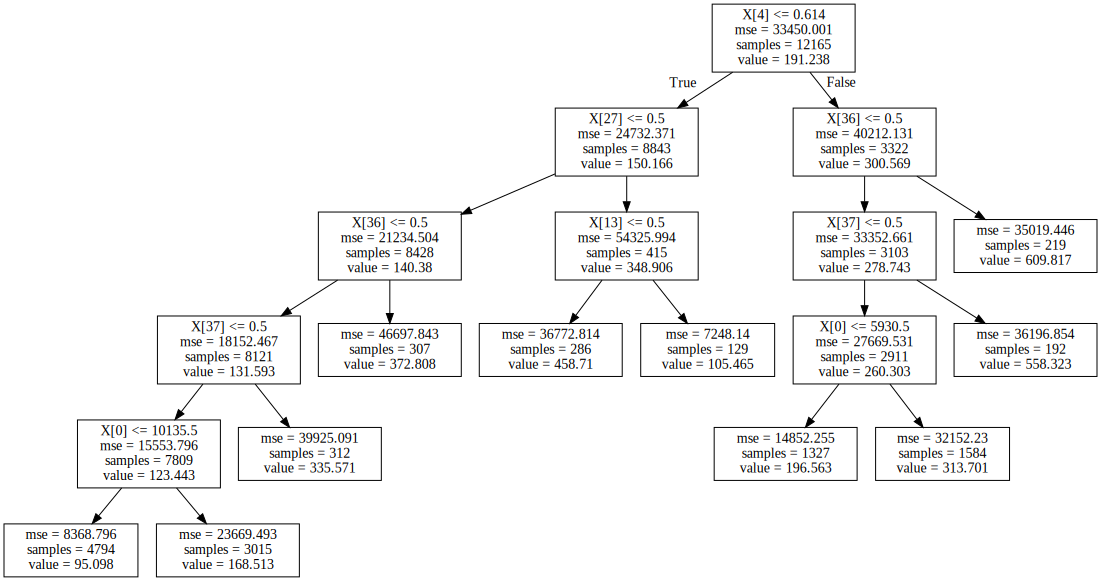

In [29]:
from sklearn import tree
import pydot
import graphviz

dot_data = tree.export_graphviz(dtr, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [30]:
predict=cross_val_predict(dtr,X_train,y_train,cv=3)
predict

array([193.73242764, 263.60073452,  77.93850806, ..., 190.21756098,
       114.44751067, 619.58208955])

In [31]:
r2_scores = cross_val_score(dtr, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.403696181361404


In [32]:
dtr_pred=dtr.predict(X_test)
dtr_pred

array([313.70138889,  95.0984564 ,  95.0984564 , ..., 313.70138889,
       168.51343284,  95.0984564 ])

In [33]:
import math
from sklearn import metrics

rmse=math.sqrt(metrics.mean_squared_error(y_test,dtr_pred))
mae=metrics.mean_absolute_error(y_test,dtr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 135.52244477952357
Mean absolute error : 106.3377588472581


# Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200)

In [35]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [36]:
rf_score =rf.score(X_train,y_train)
print('Accuracy of the model :',rf_score)

Accuracy of the model : 0.98961051007576


In [37]:
predict=cross_val_predict(rf,X_train,y_train,cv=3)
predict

array([ 44.575, 187.635,  58.5  , ..., 172.715,  98.865, 767.845])

In [38]:
r2_scores = cross_val_score(rf, X_train, y_train, cv=3)
print('R-squared scores :',np.average(r2_scores))

R-squared scores : 0.9098418729170873


In [39]:
rf_pred=rf.predict(X_test)
rf_pred

array([443.15 , 116.11 ,  12.525, ..., 501.385, 270.115,  72.175])

In [40]:
rmse = math.sqrt(metrics.mean_squared_error(y_test,rf_pred))
print('Root mean square error :',rmse)

mae=metrics.mean_absolute_error(y_test,rf_pred)
print('Mean absolute error :',mae)

Root mean square error : 45.68376512342774
Mean absolute error : 28.851581319524357
